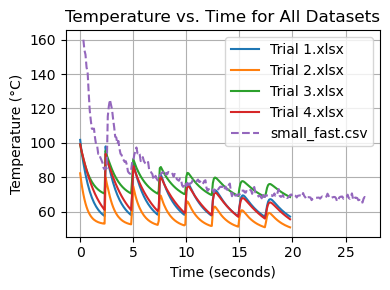

In [2]:
import pandas as pd

# Import CSV file
csv_file = "Experiment.csv"
df_csv = pd.read_csv(csv_file)

# Import Excel files
xlsx_files = ["Trial 1.xlsx", "Trial 2.xlsx", "Trial 3.xlsx", "Trial 4.xlsx"]
dfs_xlsx = {file: pd.read_excel(file) for file in xlsx_files}

import matplotlib.pyplot as plt

# Process Excel files
for file, df in dfs_xlsx.items():
    df.iloc[:, 0] -= df.iloc[0, 0]  # Normalize time column
    df.iloc[:, 1] = df.iloc[:, 1] - 273.15  # Convert Kelvin to Celsius
    dfs_xlsx[file] = df  # Store back

# Process CSV file
df_csv["Time"] = df_csv["Frame Number"] * 0.1

# Plot all datasets
plt.figure(figsize=(4, 3))

# Plot Excel files
for file, df in dfs_xlsx.items():
    plt.plot(df.iloc[:, 0], df.iloc[:, 1], label=file)

# Plot CSV file
plt.plot(df_csv["Time"], df_csv["Temperature"], label="small_fast.csv", linestyle="dashed")

# Formatting the plot
plt.xlabel("Time (seconds)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature vs. Time for All Datasets")
plt.legend()
plt.grid(True)
plt.tight_layout()
# Show plot
plt.savefig('fig.svg')
plt.show()